## Roulette Simulation and Profit Analysis

Roulette is a popular casino game played with a wheel that has numbered slots colored red, black, or green. In American roulette, the wheel has 38 slots: 18 red slots, 18 black slots, and 2 green slots labeled "0" and "00."

Players can place various types of bets, including betting on whether the outcome will be a red or black slot. In this exercise, we focus on a simple bet: betting on black.

<div style="text-align: center;">
    <img src="image.png" alt="Roulette Wheel" style="width: 30%;">
</div>

If you place a bet on black and the outcome is indeed black, you win and double your money. However, if the outcome is red or green, you lose the amount you bet. For example, if you bet 1 dollar on black and win, you gain 1 dollar. If you lose, you forfeit your 1-dollar bet.

Since there are three colors, the probability of landing on black is not exactly $\frac{1}{2}$, but rather: $\frac{18}{38} = \frac{9}{19}$

### 1.function that simulates this game for 𝑁 rounds

In [17]:
import random

def roulette_simulation(N):
    total_earned = 0
    for _ in range(N):
        number = random.randint(1, 38)
        if number <= 18:
            total_earned += 1
        else:
            total_earned -= 1
            
    return total_earned


In [18]:
N = 1000
earnings = roulette_simulation(N)
print(earnings)

-40


### 2. Monte Carlo simulation

Theoretical
  expected value for one time:     -0.053
  variance for one time:            0.99723
--------------------------------------------------
Results for N = 10:
  Sample Mean:                     -0.520
  Sample SE:                        0.00995
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.322
  Sample SE:                        0.01573
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.338
  Sample SE:                        0.03155
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.670
  Sample SE:                        0.09988
--------------------------------------------------


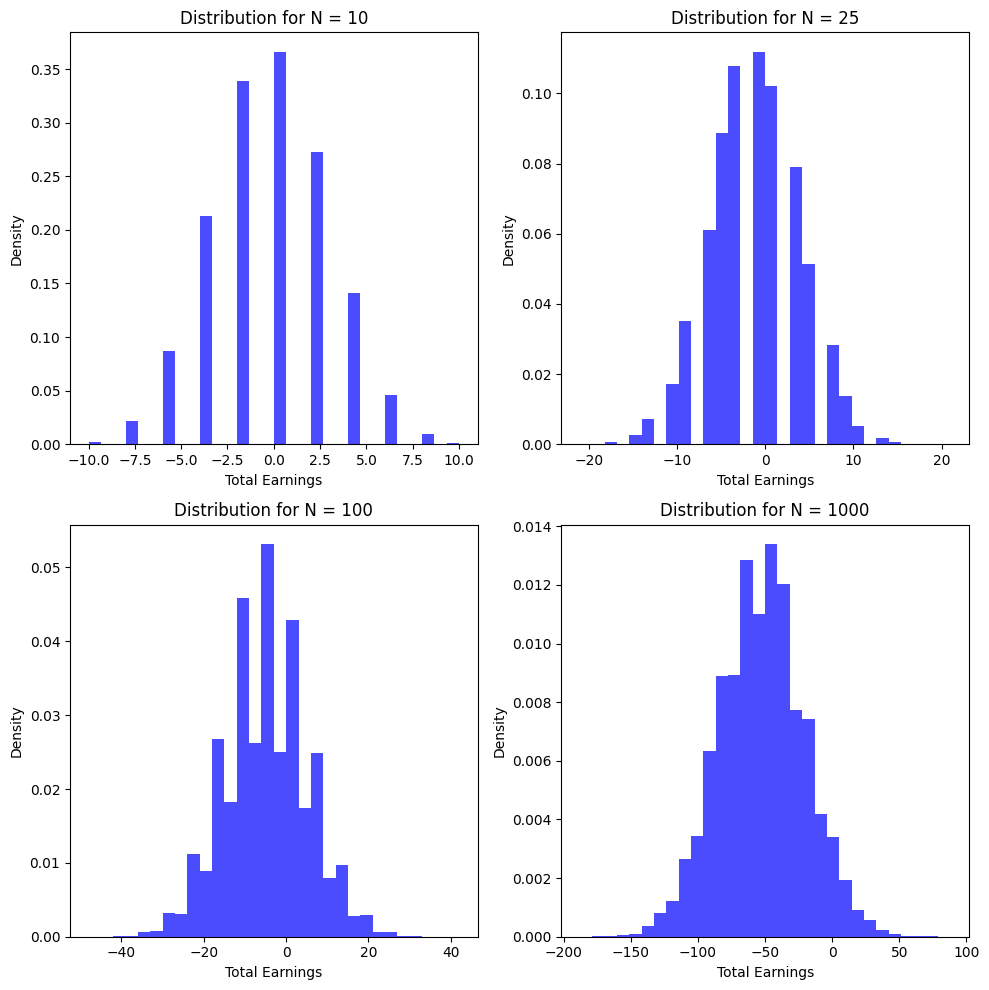

In [54]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

Expected_value_single = -1 / 19  # E(X) = (18/38)*1 + (20/38)*(-1)
Variance_single = 360 / 361  # Var(X) = 1 - (-1/19)^2

print(f"Theoretical")
print(f"  expected value for one time:     {Expected_value_single:.3f}") # theoretical_mean = N * E_single
print(f"  variance for one time:            {Variance_single:.5f}") # theoretical_std = np.sqrt(N * Var_single)
print("-" * 50)

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 3.previous simulation but for the average winnings

Theoretical
  expected value for one time:     -0.053
  variance for one time:            0.99723
--------------------------------------------------
Results for N = 10:
  Sample Mean:                     -0.053
  Sample SE:                        0.00100
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -0.053
  Sample SE:                        0.00063
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -0.053
  Sample SE:                        0.00032
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -0.052
  Sample SE:                        0.00010
--------------------------------------------------


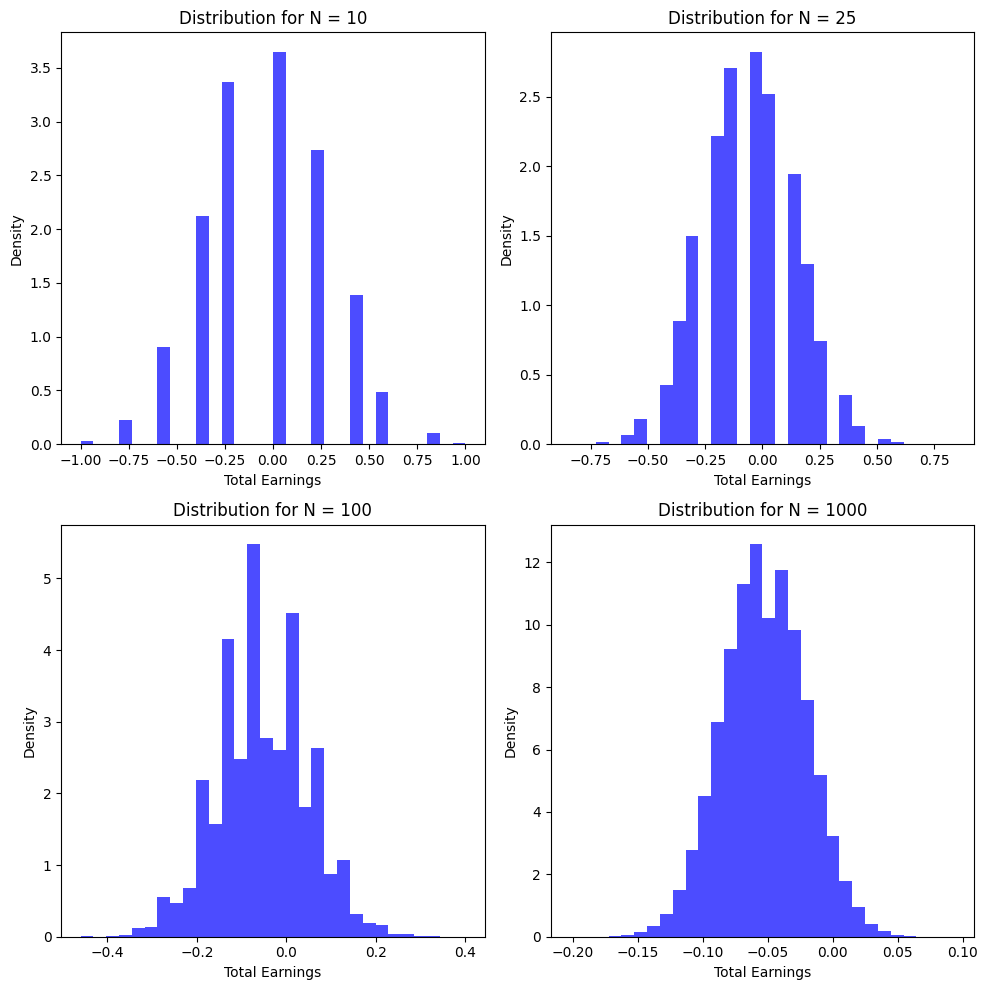

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

Expected_value_single = -1 / 19  # E(X) = (18/38)*1 + (20/38)*(-1)
Variance_single = 360 / 361  # Var(X) = 1 - (-1/19)^2

print(f"Theoretical")
print(f"  expected value for one time:     {Expected_value_single:.3f}") # theoretical_mean = N * E_single
print(f"  variance for one time:            {Variance_single:.5f}") # theoretical_std = np.sqrt(N * Var_single)
print("-" * 50)

for i in range(len(N_values)):
    
    results = [roulette_simulation(N_values[i])/N_values[i] for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution Average Winnings for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()